In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/tf/ProjectGabriel/pilca")
import matplotlib.pyplot as plt
import os
import json
import datetime
import numpy as np
import torch
import pandas as pd
from lightcurve_fitting import models as lcmd
import utils.torchphysics as tp
import utils.utils as ut 
import torch
from lightcurve_fitting import filters as flc
import utils.analysis as an
import utils.paper_plot_style as pps

torch.set_default_dtype(torch.float64)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
all_filters = ["y", "z",  "i", "r", "g", "u"][::-1]#[-2:]  # from red to UV
mjd_array = np.linspace(3, 15, 100)

filter_combinations = [all_filters[:i+1] for i in range(len(all_filters))]

max_days = 12
time_spans = np.arange(1, max_days + 1)  # [1, 2, ..., 10]

model_parameters = [.35, 2., .2, 4.0, 2.5]

# --- setup light curve builder ---
builder = ut.LCBuilder(
    model_name="sc4",
    model_parameters=model_parameters,
    model_units=[1,1,1,1,1],
    seed=42)

lc = builder.build_sim_lc(
    mjd_array=mjd_array,
    filters_list=all_filters,  # full set
    redshift=0.00526,
    dlum_factor=1e-1/2,
    dm=31.1,
    dL=19.,
    dLerr=2.9
)

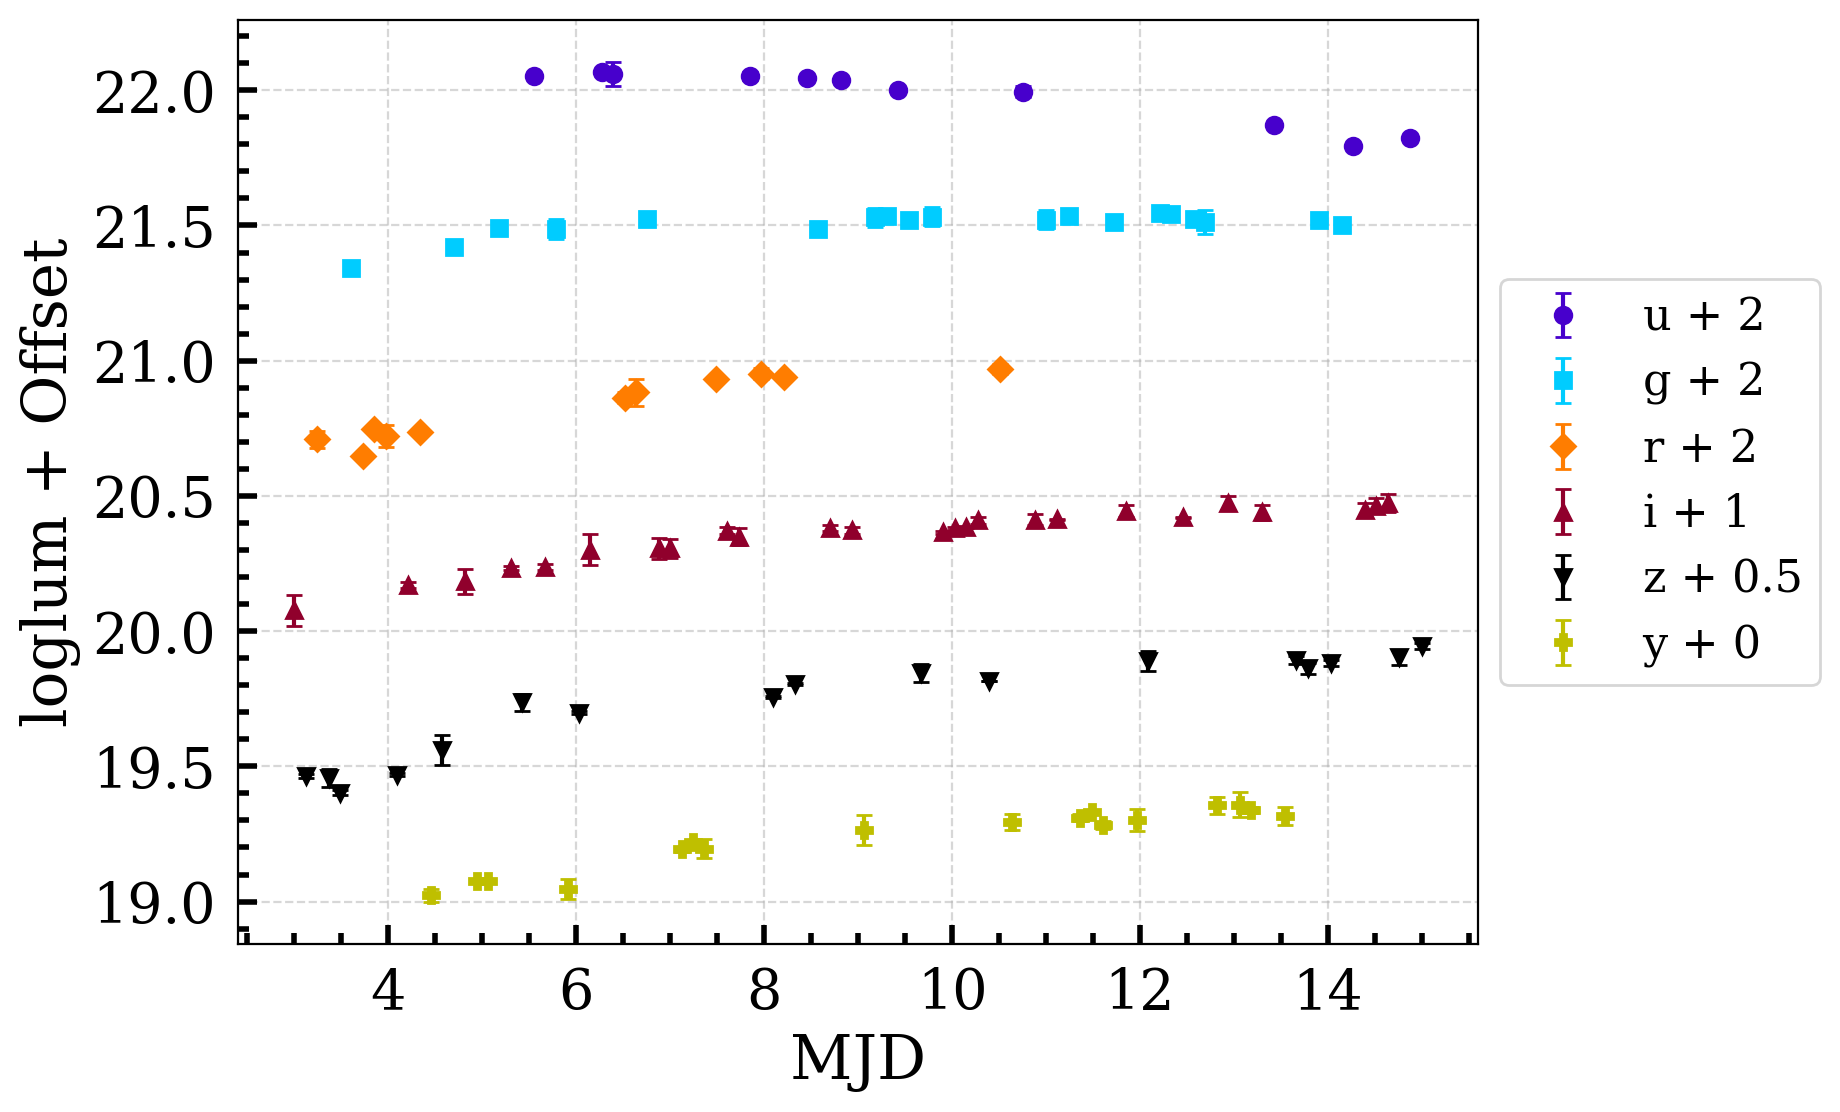

In [11]:
pps.set_plot_style()
ut.light_curve_plot(lc, ycol="loglum")